# Check web API and SEG-Y result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from obspy.io.segy.segy import _read_segy
from PIL import Image
import requests

## Submit job to test the web API

Set this to `False` if you are running a dev server on your local machine. Otherwise set it to `True` to submit jobs to the deployed version.

In [2]:
PROD = False
input_file = "/home/matt/Dropbox/dev/rainbow/notebooks/data/cbar/seismic3.png"
url = "http://127.0.0.1:5000/api"

# Or, if PROD, you'll need to provide the URI for a file on the web.
# PROD = True
# url = "http://keats.geosci.ai/api"
# input_file = "http://www.signatureseismic.com/user_files/images/fault.jpg"

In [3]:
query = {"prod": PROD,
         "url": input_file,
         "format": "segy",
         "region": "",
        }

In [4]:
r = requests.get(url, query)

In [5]:
filename = r.json()['result']['image']

In [6]:
section = _read_segy(filename)
data = np.vstack([t.data for t in section.traces])

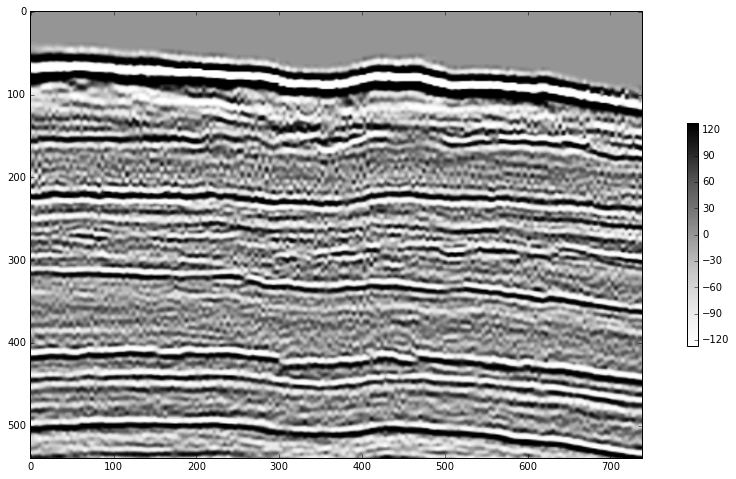

In [7]:
plt.figure(figsize=(16,8))
plt.imshow(data, cmap="Greys")
plt.colorbar(shrink=0.5)
plt.show()

## Test image output

In [8]:
# PROD = False
# input_file = "/home/matt/Dropbox/dev/rainbow/notebooks/data/cbar/fluid.png"
# url = "http://127.0.0.1:5000/api"

# Or, if PROD, you'll need to provide the URI for a file on the web.
PROD = True
url = "http://keats.geosci.ai/api"
input_file = "http://www.signatureseismic.com/user_files/images/fault.jpg"

In [9]:
query = {"prod": PROD,
         "url": input_file,
         "format": "png",
         "coolpoint": [0.0, 0.0, 0.1],
        }

r = requests.get(url, query)

filename = r.json()['result']['image']

In [10]:
r.json()

{'message': 'Thanks for using keats!',
 'parameters': {'cool_point': None,
  'format': 'PNG image',
  'hull': True,
  'interval': [0, 1],
  'n_colours': 128,
  'prod': True,
  'recover': True,
  'region': '',
  'return_cmap': False,
  'sampling': 'random',
  'url': 'http://www.signatureseismic.com/user_files/images/fault.jpg'},
 'result': {'cmap': [],
  'colours': 128,
  'image': 'https://s3.amazonaws.com/keats/38933476-391c-11e7-a772-12c112c54e63.png'},
 'status': 'success',
 'uuid': '38933476-391c-11e7-a772-12c112c54e63'}

Retrieve from local disk...

In [ ]:
image = Image.open(filename)

image

Retrieve from S3...

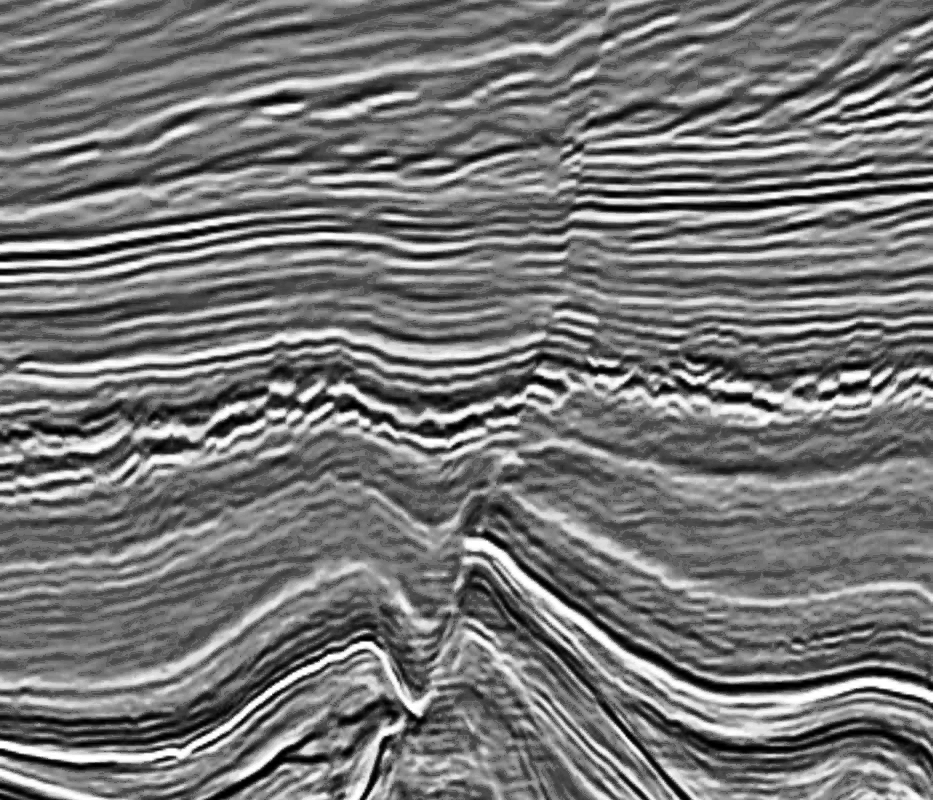

In [11]:
from io import BytesIO

r = requests.get(filename)

Image.open(BytesIO(r.content))

## Standlone example

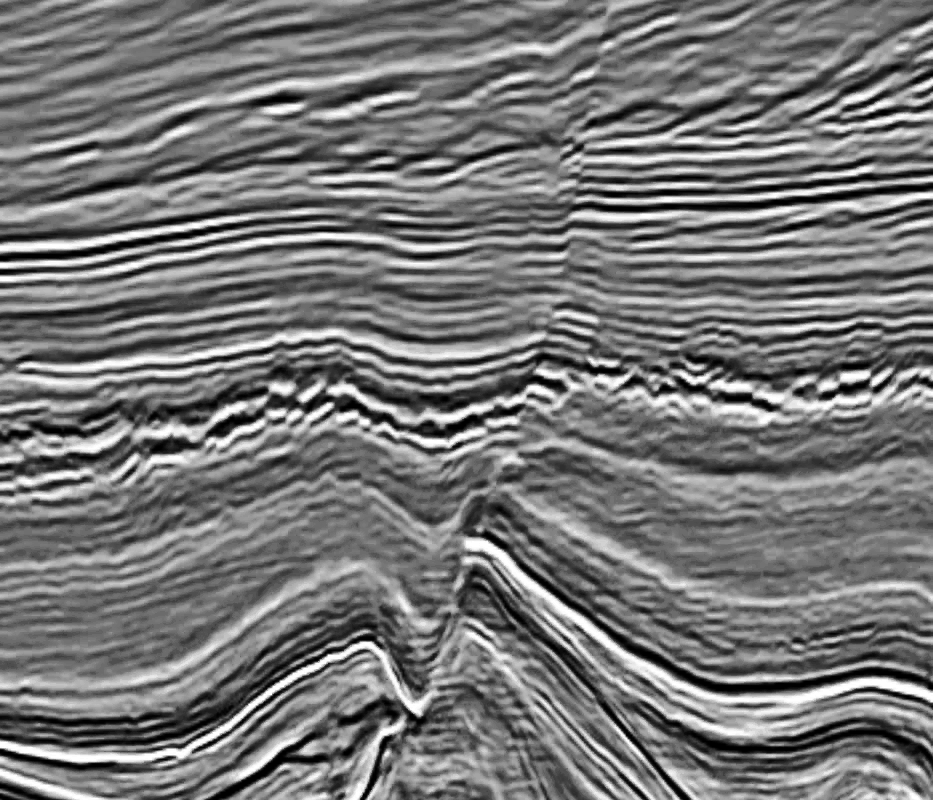

In [12]:
import requests
from io import BytesIO
from PIL import Image

url = "http://keats.geosci.ai/api"
query = {"url": "http://www.signatureseismic.com/user_files/images/fault.jpg",
         "format": "png",
         "coolpoint": [0.0, 0.0, 0.1],
        }
r = requests.get(url, query)
r = requests.get(r.json()['result']['image'])
Image.open(BytesIO(r.content))